In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# import csv file as dataframe
df = pd.read_csv("/Users/nreef/Desktop/Mauna Loa C02 Data/co2_weekly_mlo.csv", skiprows=51)

In [5]:
df.describe()


,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
count,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000
mean,1998.256582,6.532417,15.723772,1998.757471,360.357635,5.891945,331.369965,71.534196,82.350491
std,14.086428,3.451003,8.800836,14.082811,117.692119,1.360275,225.314006,556.445704,94.909850
min,1974.000000,1.000000,1.000000,1974.379500,-999.990000,0.000000,-999.990000,-999.990000,-999.990000
25%,1986.000000,4.000000,8.000000,1986.568500,347.790000,5.000000,346.210000,332.110000,67.560000
50%,1998.000000,7.000000,16.000000,1998.757500,366.790000,6.000000,364.830000,351.570000,87.600000
75%,2010.000000,10.000000,23.000000,2010.946600,390.800000,7.000000,388.850000,370.480000,110.800000
max,2023.000000,12.000000,31.000000,2023.135600,421.630000,7.000000,419.810000,397.380000,140.160000


In [6]:
# filter/clean code
t = df['decimal']
y = df['average']

mask = y>0

t = t[mask]
y = y[mask]

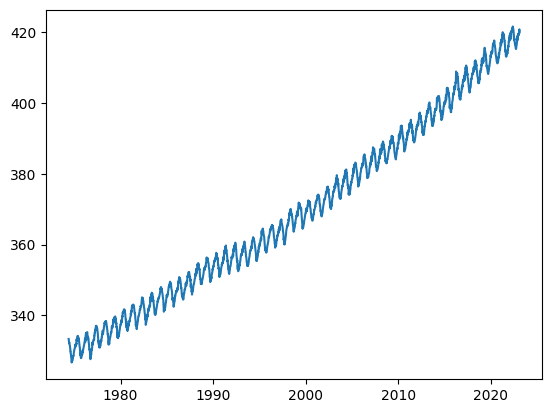

In [7]:
fig, ax = plt.subplots()
ax.plot(t,y)

In [8]:
# for pandas dataframes, 
# while the variables **appear**
# as columns, internally they are rows.
# so, we need to build up the matrix in 
# rows, (vstack="vertical stack") then 
# take its transpose.
A = np.vstack([
    np.ones(t.shape), 
    t,
    t**2,
    np.sin(t*(2*np.pi)),
    np.cos(t*(2*np.pi)),
    1/(1+t**2)
    ])


In [9]:
# transpose
A = A.T

In [20]:
a

array([ 5.20875215e+04, -5.35759516e+01,  1.38584580e-02,  2.84903149e+00,
       -7.95961669e-01,  7.82396196e-02])

In [10]:
# least squares regression for best fit
solver_output = np.linalg.lstsq(A, y, rcond=None)
a = solver_output[0]

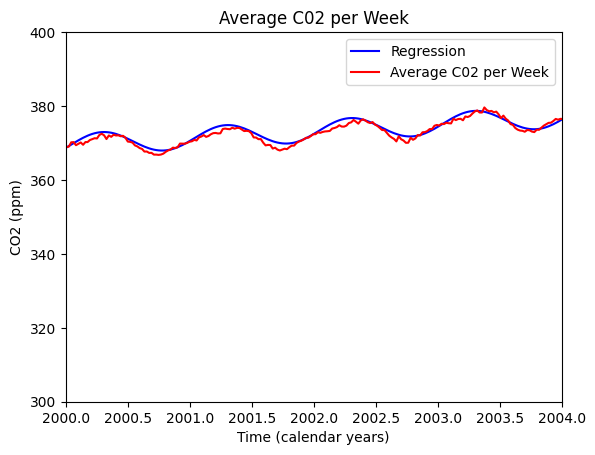

In [19]:
# plot the best fit model prediction
plt.xlabel("Time (calendar years)")
plt.ylabel("CO2 (ppm)")
plt.plot(t, np.dot(A, a), label="Regression", color="blue")
plt.plot(t,y, label="Average C02 per Week", color="red")
plt.xlim(2000,2004)
plt.ylim(300,400)
plt.title("Average C02 per Week")
plt.legend()
plt.savefig('MaunaLoa.png', bbox_inches='tight')